In [91]:
from google.colab import drive ; drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [93]:
df = pd.read_csv("/content/drive/My Drive/DataSet/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
print("Null values Total --> " ,df.isna().sum().sum() )
print("unique Values --> " , df.nunique() )
print("Total Rows " , df.shape[0])
print('Total Col ' , df.shape[1])


Null values Total -->  0
unique Values -->  gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64
Total Rows  1000
Total Col  8


We get math score , reading score and writing score is ---> continous numerical ,i guess...
 Need to know What the rest var ,exclude Gender
 



In [95]:
## Investigate the Parental Level of education as it's a ordinal categorical --> Orders MATTER
dfcopy0 = df.copy()
dfcopy0["parental level of education"].replace({"master's degree" : 1,
                                           "bachelor's degree" : 2,
                                           "associate's degree" : 3,
                                           "high school" : 4,
                                           "some high school":5,
                                           "some college" : 6}, inplace = True)
dfcopy0["test preparation course"].replace({"none":0,
                                            "completed":1},inplace = True)
dfcopy0["gender"].replace({"female":1,
                           "male":0} , inplace = True)
dfcopy0["lunch"].replace({"standard":0,
                          "free/reduced":1} , inplace = True)
dfcopy0["race/ethnicity"].replace({"group A" :  0 ,
                                    "group B" : 1 , 
                                    "group C" : 2 , 
                                    "group D" : 3 ,
                                    "group E":  4 } , inplace = True)
dfcopy0.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,2,0,0,72,72,74
1,1,2,6,0,1,69,90,88
2,1,1,1,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,6,0,0,76,78,75


In [103]:
dfcopy0["gender"].corr(dfcopy0["parental level of education"])

-0.027569121715390804

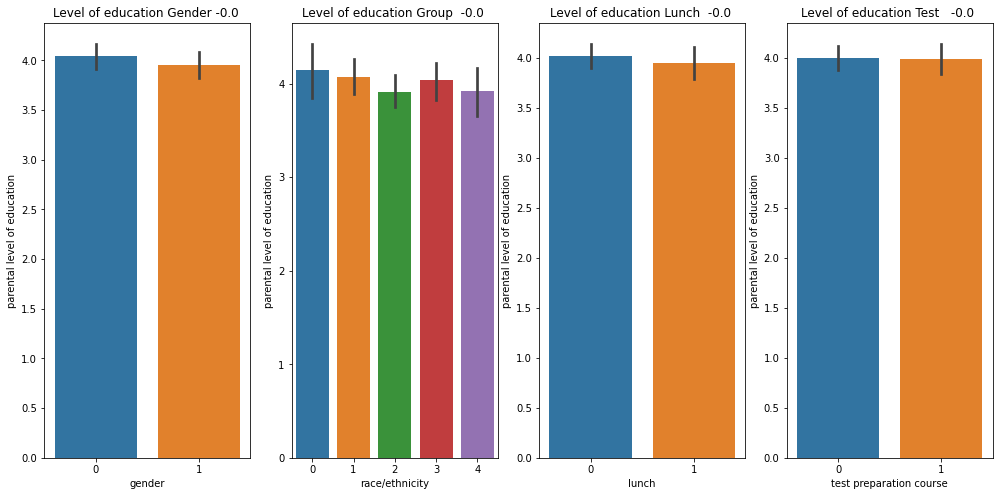

In [108]:
## Do the explanatory data Analysis ,LOL
## Reason i m not using loops , just tried to make my self remember the syntax
f , ax = plt.subplots(ncols = 4 ,figsize = (17,8))
ax[0].set(title = "Level of education Gender {} " .format( round(dfcopy0["gender"].corr(dfcopy0["parental level of education"])),5))
ax[1].set(title = "Level of education Group  {} " .format( round(dfcopy0["race/ethnicity"].corr(dfcopy0["parental level of education"])),5))
ax[2].set(title = "Level of education Lunch  {} " .format( round(dfcopy0["lunch"].corr(dfcopy0["parental level of education"])),5))
ax[3].set(title = "Level of education Test   {} " .format( round(dfcopy0["test preparation course"].corr(dfcopy0["parental level of education"]))))

sns.barplot(x = "gender" , y = "parental level of education" , data = dfcopy0 ,ax = ax[0])
sns.barplot(x = "race/ethnicity" , y = "parental level of education" , data = dfcopy0 , ax = ax[1])
sns.barplot(x = "lunch" , y = "parental level of education" , data = dfcopy0 , ax = ax[2])
sns.barplot(x = "test preparation course" , y = "parental level of education" , data = dfcopy0 , ax = ax[3])
 

Seems every features have balanced distribution , but none of these var have correlation with the level of education,for this dataset

In [97]:
## We're going to Transform it , ORDNINAL FOR THE LEVEL and rest it's just nominal
copydf = df.copy()
Fordummies = ["race/ethnicity","gender","lunch"]
copydf["parental level of education"].replace({"master's degree" : 1,
                                           "bachelor's degree" : 2,
                                           "associate's degree" : 3,
                                           "high school" : 4,
                                           "some high school":4,
                                           "some college" : 5}, inplace = True)
copydf["test preparation course"].replace({"none":0,
                                       "completed":1},inplace=True)
dummies = pd.get_dummies(data = copydf[Fordummies] , drop_first= True)
Newdf = pd.concat([copydf,dummies] ,axis= 1)
Newdf.drop(Fordummies , axis = 1,inplace=True)
Newdf.head()

,parental level of education,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_male,lunch_standard
0,2,0,72,72,74,1,0,0,0,0,1
1,5,1,69,90,88,0,1,0,0,0,1
2,1,0,90,95,93,1,0,0,0,0,1
3,3,0,47,57,44,0,0,0,0,1,0
4,5,0,76,78,75,0,1,0,0,1,1
